<a href="https://colab.research.google.com/github/zeuslawyer/exploratory_data_analyses_tute/blob/main/us_accidents_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analyses - US Accidents
- Taken from Jovians [Youtube tute](https://www.youtube.com/watch?v=kLDTbavcmd0)
- Kaggle Dataset is the [US Accidents dataset](https://www.kaggle.com/sobhanmoosavi/us-accidents) with 3 million records

<hr>


resume at : https://youtu.be/kLDTbavcmd0?t=1937


# Here are the steps for EDA
- 🔍 Select & Download a large real-world dataset from Kaggle
- ⚒ Perform data preparation & cleaning using Pandas & Numpy
- 🔁 Perform exploratory analysis & visualization using Matplotlib & Seaborn
- 🙋‍♂️ Ask & answer questions about the data in a Jupyter notebook
- 📝 Summarize your inferences & write a conclusion
- 📑 Document, publish, and present and your Jupyter notebook online


These steps are reproduced as section headings below.


### DOWNLOAD THE DATA SET FROM KAGGLE

In [ ]:
# Use the Jovian opendatasets tool to enable Colab to connect/remotely download the data set.  
# https://github.com/JovianML/opendatasets

!pip install opendatasets --upgrade --quiet # to pip install in colab, you need to prefix with ! - Ref: https://stackoverflow.com/questions/66610412/google-colab-syntax-error-invalid-syntax

In [ ]:
import opendatasets as od

dataset_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)


Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


## ⚒ Perform data preparation & cleaning using Pandas & Numpy

- load file with pandas
- examine information: check dimensions of df, how many numeric columns etc
- clean data, fix incorrect/missing vals etc
- transform data as necessary to process

In [ ]:
import pandas as pd

data_file='/content/us-accidents/US_Accidents_Dec20_Updated.csv'
df = pd.read_csv(data_file)

In [ ]:
# df.shape # show number of rows, cols
# df.describe() # show basic stats on the numerical values in the DF
# df.head(3) # get the head of N rows
# df.info() # same as df.columns.  Check cols and type of each.

In [ ]:
# get all columns that have numeric data types
df.select_dtypes(include='number')


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2,34.808868,-82.269157,34.808868,-82.269157,0.000,439.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,2,35.090080,-80.745560,35.090080,-80.745560,0.000,3299.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0
2,2,37.145730,-121.985052,37.165850,-121.988062,1.400,NaN,51.0,51.0,80.0,30.17,10.0,6.0,0.0
3,2,39.110390,-119.773781,39.110390,-119.773781,0.000,NaN,53.6,NaN,16.0,30.16,10.0,4.6,NaN
4,3,26.102942,-80.265091,26.102942,-80.265091,0.000,NaN,84.2,NaN,84.0,29.92,10.0,13.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,2,29.813824,-95.399437,29.813824,-95.399437,0.000,3001.0,84.2,NaN,70.0,30.02,9.0,5.8,NaN
2906606,2,34.068890,-117.342010,34.068890,-117.342010,0.000,NaN,46.9,NaN,74.0,30.14,10.0,NaN,NaN
2906607,2,25.702200,-80.335556,25.703040,-80.334099,0.108,8798.0,76.0,76.0,85.0,30.00,10.0,16.0,0.0
2906608,2,40.660140,-111.952460,40.660140,-111.952460,0.000,NaN,27.0,19.0,81.0,25.81,10.0,8.0,0.0


In [ ]:
# find missing values in pandas
df.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
 # count missing values per col, sort descending, and express as %
missing_percents = ( df.isna().sum().sort_values(ascending=False)/len(df) ) * 100
print("% of data missing per Col: \n",missing_percents)

% of data missing per Col: 
 Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              

In [ ]:
type(missing_percents)

pandas.core.series.Series

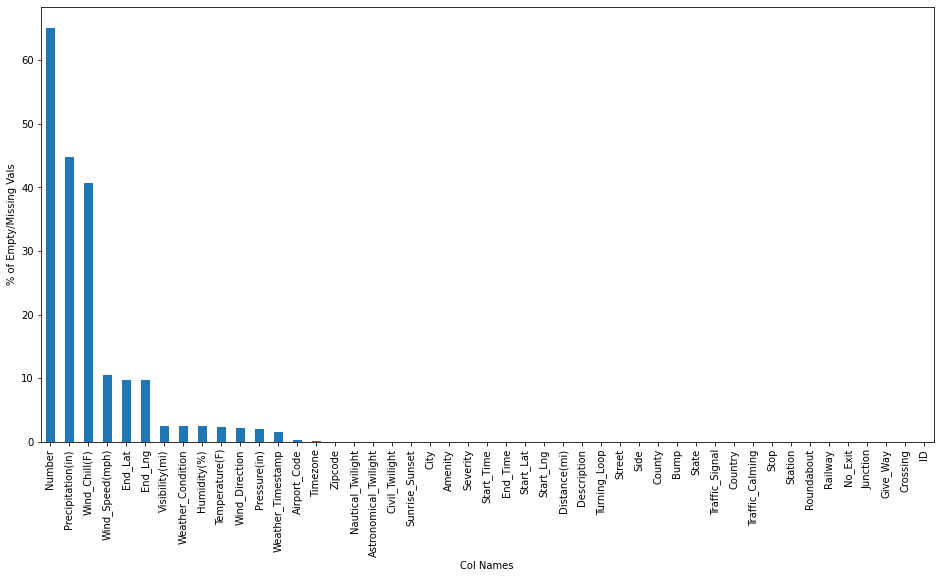

In [ ]:
# VIEW AS A GRAPH
missing_percents.plot(kind='bar', figsize=(16, 8), xlabel="Col Names", ylabel="% of Empty/Missing Vals")

## 🔁 Perform exploratory analysis & visualization using Matplotlib & Seaborn

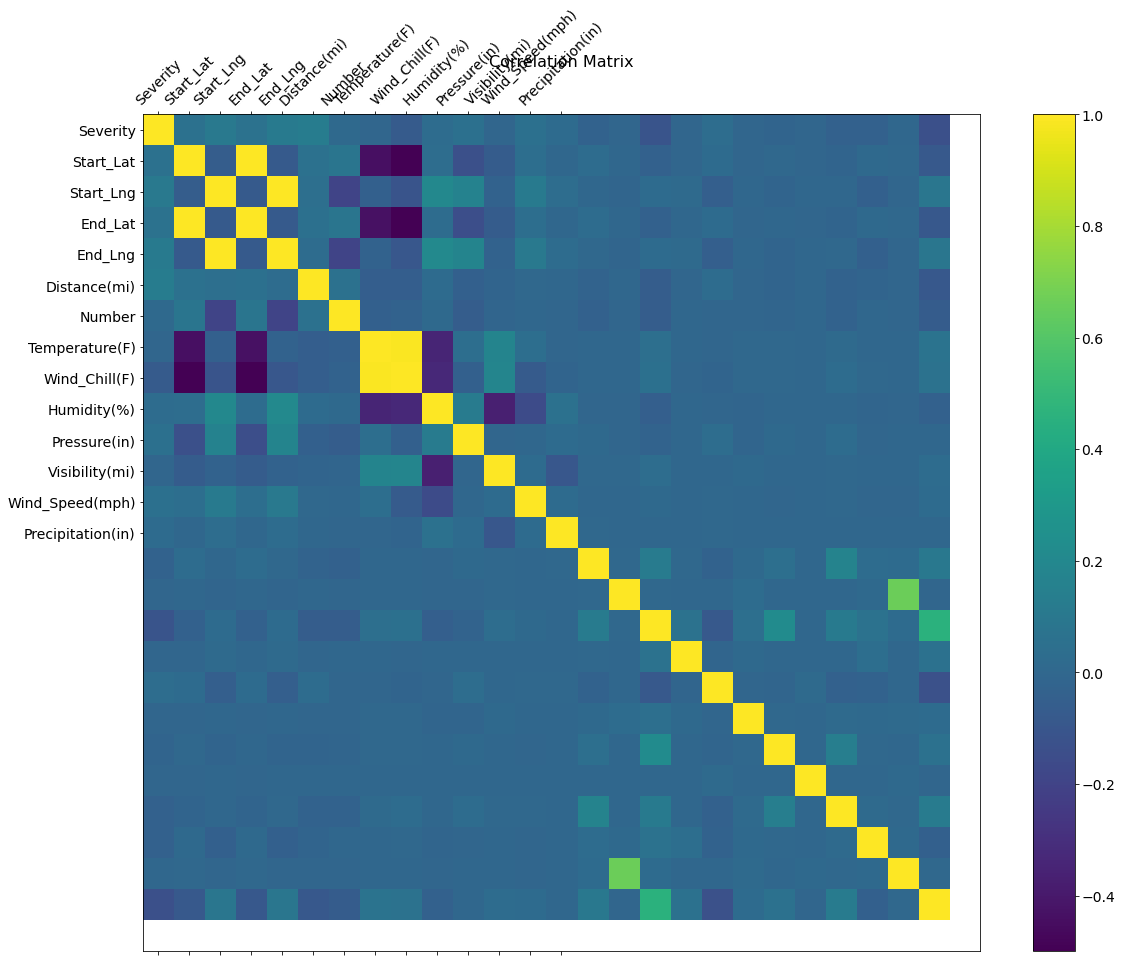

In [ ]:
# show correlations ( ref: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,0,1,2,3,4,5,6,7,8,9
0,1.000,0.348,0.399,0.456,0.073,-0.233,-0.731,0.478,-0.443,0.015
1,0.348,1.000,-0.284,0.571,-0.285,0.382,-0.363,0.643,0.253,0.190
2,0.399,-0.284,1.000,-0.524,0.153,-0.139,-0.093,0.016,-0.434,-0.384
3,0.456,0.571,-0.524,1.000,-0.225,-0.228,-0.482,0.473,0.279,0.447
4,0.073,-0.285,0.153,-0.225,1.000,-0.104,-0.147,-0.523,-0.615,-0.190
5,-0.233,0.382,-0.139,-0.228,-0.104,1.000,-0.030,0.418,0.206,0.095
6,-0.731,-0.363,-0.093,-0.482,-0.147,-0.030,1.000,-0.494,0.381,-0.354
7,0.478,0.643,0.016,0.473,-0.523,0.418,-0.494,1.000,0.376,0.418
8,-0.443,0.253,-0.434,0.279,-0.615,0.206,0.381,0.376,1.000,0.150
9,0.015,0.190,-0.384,0.447,-0.190,0.095,-0.354,0.418,0.150,1.000


## 🙋‍♂️ Ask & answer questions about the data in a Jupyter notebook
- Is there a correlation between temperature and accident rates?
- which 5 states have the highest number of accidents <i> per capita </i>

## 📝 Summarize your inferences & write a conclusion